In [42]:
from warnings import filterwarnings
filterwarnings('ignore')
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.cluster import KMeans


# K Means

* Amac gozlemleri birbirine olan benzerliklerine gore kumeler ayirmak.

 * Adimlar 
- Kume sayisi belirlenir
- Rastgele  K merkez secilir
- Her gozlem icin k merkezlere uzakliklar hesaplanir
- Gozlemler kendisine en yakin merkeze atanir
- Atama islemlerinden sonra olusan kumeler icin tekrar merkez hesaplamasi yapilir.
- Bu islem belirlenen iterasyon adedince yapilir, kume ici "hata kareler toplaminin" toplamlarinin minimum oldugu durumlardaki kumelenme nihai kumelenme kabul edilir

In [2]:
url = "https://raw.githubusercontent.com/fatihcihant/VeribilimiveMachineLearningNotlar/master/USArrests.csv"
df = pd.read_csv(url).copy()

In [3]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


* Unnamed aslinda degisken degil, gozlem birimi. Bunu indexe atayip kaldirmamiz gerekir

In [4]:
df.index = df.iloc[:,0]

In [5]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
Unnamed: 0,,,,,
Alabama,Alabama,13.2,236,58,21.2
Alaska,Alaska,10.0,263,48,44.5
Arizona,Arizona,8.1,294,80,31.0
Arkansas,Arkansas,8.8,190,50,19.5
California,California,9.0,276,91,40.6


In [6]:
df = df.iloc[:,1:5]

In [7]:
df.head()

,Murder,Assault,UrbanPop,Rape
Unnamed: 0,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [8]:
del df.index.name

In [9]:
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [10]:
df.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
Murder      50 non-null float64
Assault     50 non-null int64
UrbanPop    50 non-null int64
Rape        50 non-null float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000204D2074780>,
      dtype=object)

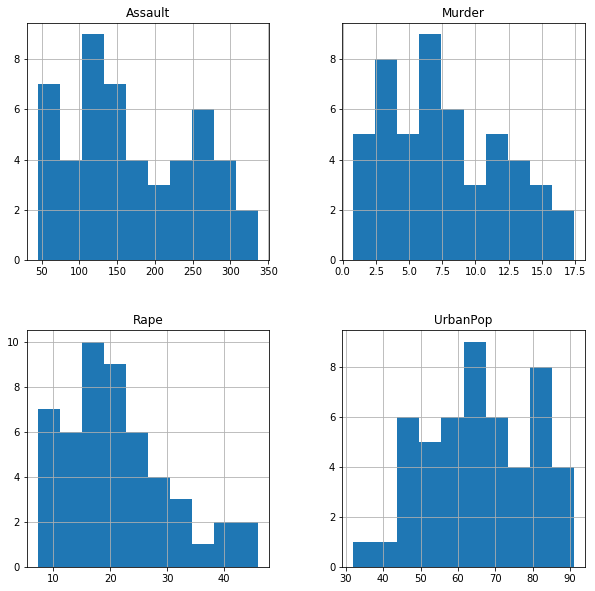

In [13]:
df.hist(figsize=(10,10))

* Gorseldeki tepeler bize kume sayisi hakkinda kabaca bilgi verebilir

## Model & Tahmin

In [14]:
kmeans = KMeans(n_clusters = 4)
kmeans

KMeans(n_clusters=4)

In [15]:
?kmeans

Type:        KMeans
String form: KMeans(n_clusters=4)
File:        c:\users\90530\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py
Docstring:  
K-Means clustering.

Read more in the :ref:`User Guide <k_means>`.

Parameters
----------

n_clusters : int, default=8
    The number of clusters to form as well as the number of
    centroids to generate.

init : {'k-means++', 'random'}, callable or array-like of shape             (n_clusters, n_features), default='k-means++'
    Method for initialization:

    'k-means++' : selects initial cluster centers for k-mean
    clustering in a smart way to speed up convergence. See section
    Notes in k_init for more details.

    'random': choose `n_clusters` observations (rows) at random from data
    for the initial centroids.

    If an array is passed, it should be of shape (n_clusters, n_features)
    and gives the initial centers.

    If a callable is passed, it should take arguments X, n_clusters and a
    random state and return an i

In [16]:
k_fit = kmeans.fit(df)

In [17]:
k_fit.cluster_centers_ # 4 degisken icin merkezi degerler

array([[ 11.8125    , 272.5625    ,  68.3125    ,  28.375     ],
       [  5.59      , 112.4       ,  65.6       ,  17.27      ],
       [  8.21428571, 173.28571429,  70.64285714,  22.84285714],
       [  2.95      ,  62.7       ,  53.9       ,  11.51      ]])

In [18]:
k_fit.labels_ # gozlemlerin hangi classa ait oldugu bilgisi

array([0, 0, 0, 2, 0, 2, 1, 0, 0, 2, 3, 1, 0, 1, 3, 1, 1, 0, 3, 0, 2, 0,
       3, 0, 2, 1, 1, 0, 3, 2, 0, 0, 0, 3, 1, 2, 2, 1, 2, 0, 3, 2, 2, 1,
       3, 2, 2, 3, 3, 2])

In [19]:
kmeans = KMeans(n_clusters = 2)
k_fit = kmeans.fit(df) # gorsellestirme icin once 2 boyutla baslayalim

In [20]:
kumeler = k_fit.labels_

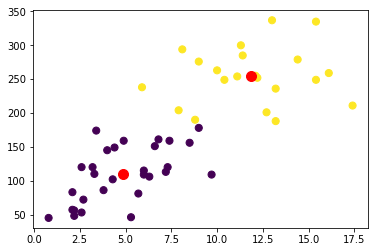

In [21]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c = kumeler, s = 50, cmap = "viridis")

merkezler = k_fit.cluster_centers_

plt.scatter(merkezler[:,0], merkezler[:,1], c = "red", s=100, alpha = 1)

In [22]:
from mpl_toolkits.mplot3d import Axes3D # 3d gosterim icin

In [23]:
kmeans = KMeans(n_clusters = 3)
k_fit = kmeans.fit(df)
kumeler = k_fit.labels_
merkezler = kmeans.cluster_centers_


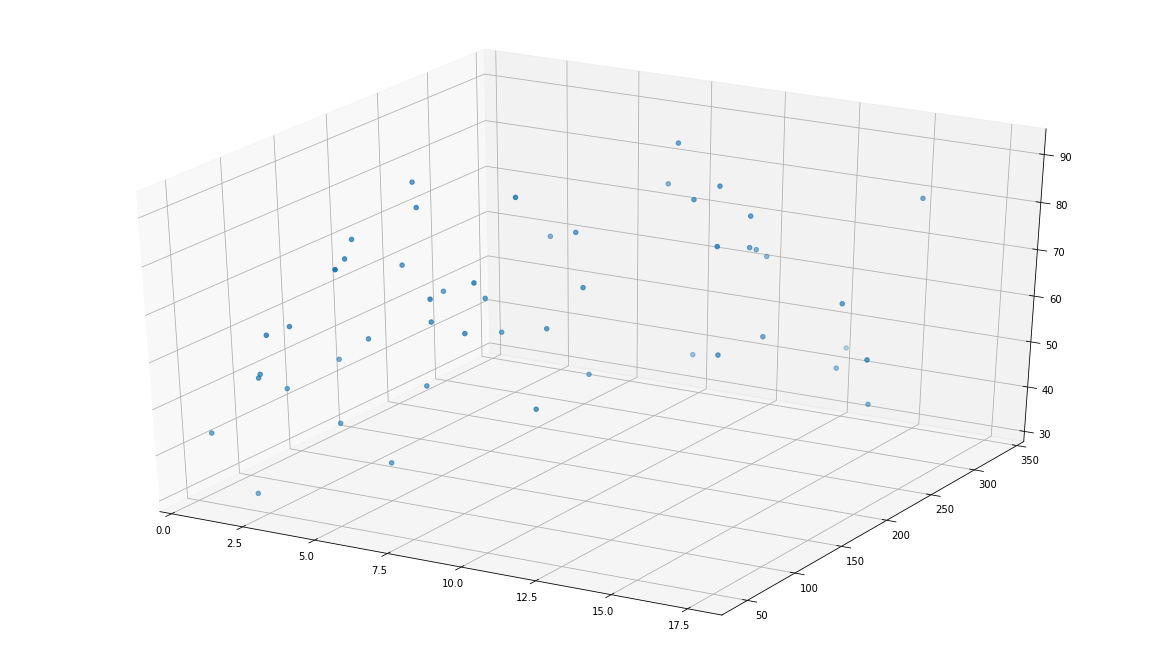

In [24]:
plt.rcParams['figure.figsize'] = [16,9]
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df.iloc[:,0], df.iloc[:,1], df.iloc[:,2]);





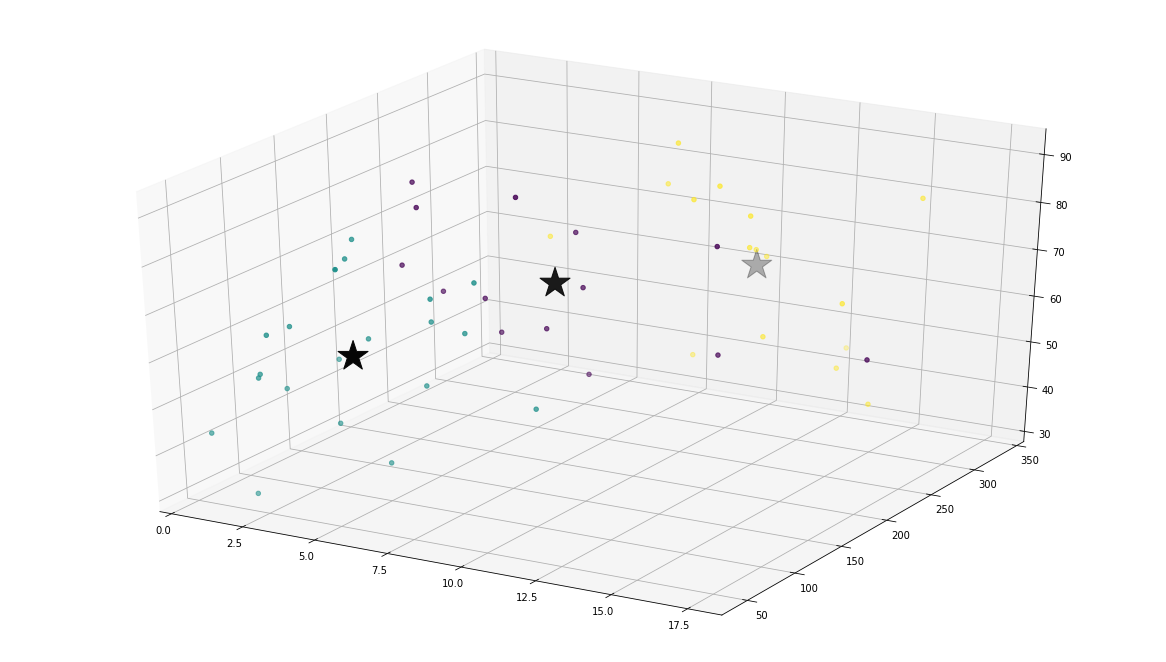

In [25]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 2], c=kumeler)
ax.scatter(merkezler[:, 0], merkezler[:, 1], merkezler[:, 2], 
           marker='*', 
           c='#050505', 
           s=1000);

* Elimizde 10-15 tane degisken olabilir. Bu durumda bilgi kaybini goze alp verisetine PCA uygulayip sonra gorsellestirilmesi yapilabilir.

In [26]:
kmeans = KMeans(n_clusters = 3)
k_fit = kmeans.fit(df)
kumeler = k_fit.labels_


In [27]:
pd.DataFrame({"Eyaletler": df.index, 
             "Kumeler": kumeler})[0:10] # Eyaletlerin hangi sinifa ait oldugu bilgisi

,Eyaletler,Kumeler
0,Alabama,1
1,Alaska,1
2,Arizona,1
3,Arkansas,2
4,California,1
5,Colorado,2
6,Connecticut,0
7,Delaware,1
8,Florida,1
9,Georgia,2


In [28]:
df["kumeler"] = kumeler # df'e eklendi

In [29]:
df.head()

,Murder,Assault,UrbanPop,Rape,kumeler
Alabama,13.2,236,58,21.2,1
Alaska,10.0,263,48,44.5,1
Arizona,8.1,294,80,31.0,1
Arkansas,8.8,190,50,19.5,2
California,9.0,276,91,40.6,1


In [30]:
df["kumeler"] = df["kumeler"] + 1 # 0dan baslamasini engellemek istersek...

In [31]:
df.head()

,Murder,Assault,UrbanPop,Rape,kumeler
Alabama,13.2,236,58,21.2,2
Alaska,10.0,263,48,44.5,2
Arizona,8.1,294,80,31.0,2
Arkansas,8.8,190,50,19.5,3
California,9.0,276,91,40.6,2


## Optimum Kume Sayisi Belirleme

* Elbow yontemi kullanacagiz ...

# Hiyerarsik Kumeleme

* Gozlem birimlerini birbirlerine olan benzerliklerine gore alt kumelere ayirma.

 Baslangicta gozlem sayisi kadar kume vardir
 
* *Adim 1:* Veri setinde birbirine en yakin 2 gozlem bulunur.
* *Adim 2:* Bu iki nokta bir araya getirilerek yeni bir gozlem olusturulur. Yani artik veri seti ilk birlsimdeki gozlemlerden olusmaktadir.
* *Adim 3:* Ayni islem tekrarlanarak yukari dogru cikilir. Yani iki kumenin birlesiminden olusan bu yeni kumeler ayni sekilde birbirlerine benzerliklerine gore tekrar birlestirilir. Bu islem tum gozlemler tek bir kumede toplanana kadar devam ettirilir.

Birbirlerine yakin noktalar uzaklik olculeri kullanarak belirlenir.(Oklid, Manhattan...)

Bolumleyici Kumeleme:

* *Adim 1:* Tum gozlemlerin bir arada oldugu kume iki alt kumeye ayrilir.
* *Adim 2:* Olusan yeni kumeler birbirine benzemeyen alt kumelere bolunur.
* *Adim 3:* Ayni islem gozlems ayisi kadar kume elde edene dek tekrarlanir.

Hiyerarsik vs Karar Agaclari vs Hiyerarsik olmayan

* Hiyerarsik yontemlerde kume sayisina dendogram sonuclarina bakilarak karar verilirken, hiyerarsik olmayan yontemlerde kume sayisi uygulama yapilmadan once karar verilir.
* Hiyerarsik kumeleme yontemlerinde veriseti gozlemler ya da degiskenler bazinda kumeleme islemine sokulabilirken, hiyerarsik olmayan yontemlerde sadee gozlemlerin kumelenmesi soz konusudur.
* Karar agaclarindan farki; karar agaclarinda ayirma islemi hedef degiskene gore yapilirken burada bagimli degisken olmadigindan gozlemler bagimsiz degiskenler uzerinden uzaklik hesaplariyla kumelenir.

In [55]:
url = "https://raw.githubusercontent.com/fatihcihant/VeribilimiveMachineLearningNotlar/master/USArrests.csv"
df = pd.read_csv(url).copy()
df.index = df.iloc[:,0]
df = df.iloc[:,1:5]
del df.index.name
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [56]:
from scipy.cluster.hierarchy import linkage
hc_complete = linkage(df, "complete")
hc_average = linkage(df, "average")
hc_single = linkage(df, "single")

In [57]:
#dir(hc_complete)

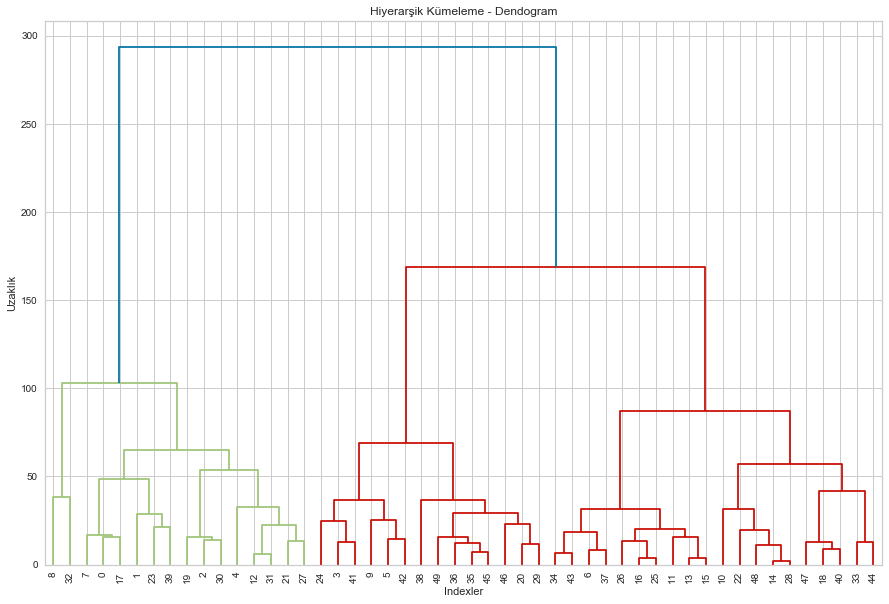

In [58]:
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(15, 10))
plt.title('Hiyerarşik Kümeleme - Dendogram')
plt.xlabel('Indexler')
plt.ylabel('Uzaklık')
dendrogram(
    hc_complete,
    leaf_font_size=10
); # ; isareti kaldirirsak modeli olusturulurken kullanilan degerleri goruruz

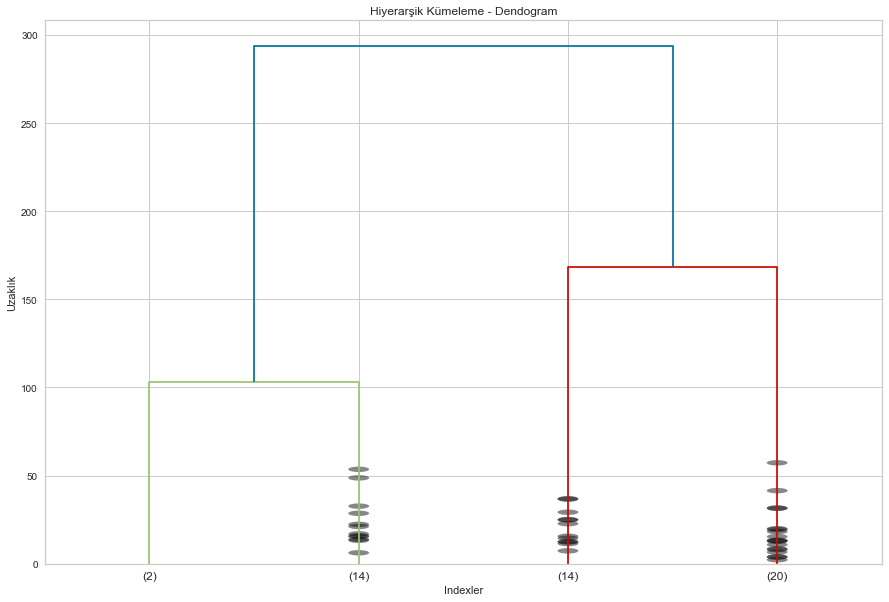

In [59]:
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(15, 10))
plt.title('Hiyerarşik Kümeleme - Dendogram')
plt.xlabel('Indexler')
plt.ylabel('Uzaklık')
dendrogram(
    hc_complete,
    truncate_mode = "lastp",
    p = 4, # kume sayisi
    show_contracted = True
);

* Alttaki sayilar kumedeki eleman sayisini gosterir

## Optimum Kume Sayisi

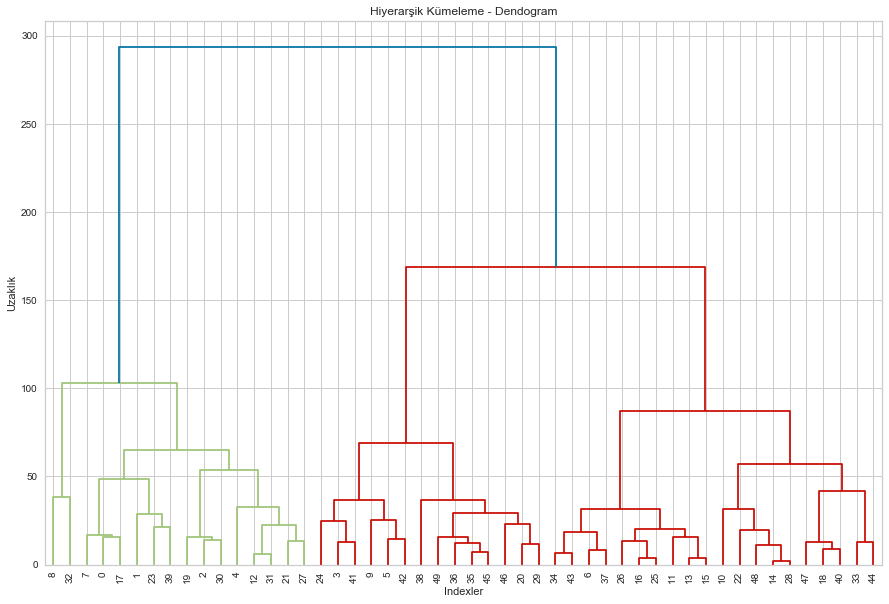

In [61]:
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(15, 10))
plt.title('Hiyerarşik Kümeleme - Dendogram')
plt.xlabel('Indexler')
plt.ylabel('Uzaklık')
den = dendrogram(
    hc_complete,
    leaf_font_size=10
);

In [62]:
?den

Type:        dict
String form: {'icoord': [[5.0, 5.0, 15.0, 15.0], [35.0, 35.0, 45.0, 45.0], [25.0, 25.0, 40.0, 40.0], [65.0, 65 <...> , 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'b']}
Length:      5
Docstring:  
dict() -> new empty dictionary
dict(mapping) -> new dictionary initialized from a mapping object's
    (key, value) pairs
dict(iterable) -> new dictionary initialized as if via:
    d = {}
    for k, v in iterable:
        d[k] = v
dict(**kwargs) -> new dictionary initialized with the name=value pairs
    in the keyword argument list.  For example:  dict(one=1, two=2)


In [63]:
?dendrogram

Signature:
dendrogram(
    Z,
    p=30,
    truncate_mode=None,
    color_threshold=None,
    get_leaves=True,
    orientation='top',
    labels=None,
    count_sort=False,
    distance_sort=False,
    show_leaf_counts=True,
    no_plot=False,
    no_labels=False,
    leaf_font_size=None,
    leaf_rotation=None,
    leaf_label_func=None,
    show_contracted=False,
    link_color_func=None,
    ax=None,
    above_threshold_color='b',
)
Docstring:
Plot the hierarchical clustering as a dendrogram.

The dendrogram illustrates how each cluster is
composed by drawing a U-shaped link between a non-singleton
cluster and its children.  The top of the U-link indicates a
cluster merge.  The two legs of the U-link indicate which clusters
were merged.  The length of the two legs of the U-link represents
the distance between the child clusters.  It is also the
cophenetic distance between original observations in the two
children clusters.

Parameters
----------
Z : ndarray
    The linkage matrix enc

In [64]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters = 4, 
                                  affinity = "euclidean", 
                                  linkage = "ward")

cluster.fit_predict(df)

array([0, 0, 0, 2, 0, 2, 3, 0, 0, 2, 1, 3, 0, 3, 1, 3, 3, 0, 1, 0, 2, 0,
       1, 0, 2, 3, 3, 0, 1, 2, 0, 0, 0, 1, 3, 2, 2, 3, 2, 0, 1, 2, 2, 3,
       1, 2, 2, 1, 1, 2], dtype=int64)

In [65]:
pd.DataFrame({"Eyaletler" : df.index, "Kumeler": cluster.fit_predict(df)})[0:10]

,Eyaletler,Kumeler
0,Alabama,0
1,Alaska,0
2,Arizona,0
3,Arkansas,2
4,California,0
5,Colorado,2
6,Connecticut,3
7,Delaware,0
8,Florida,0
9,Georgia,2


In [66]:
df["kume_no"] = cluster.fit_predict(df)

In [67]:
df.head()

,Murder,Assault,UrbanPop,Rape,kume_no
Alabama,13.2,236,58,21.2,0
Alaska,10.0,263,48,44.5,0
Arizona,8.1,294,80,31.0,0
Arkansas,8.8,190,50,19.5,2
California,9.0,276,91,40.6,0


# Temel Bilesen Analizi (PCA)

In [69]:
url = "https://raw.githubusercontent.com/fatihcihant/VeribilimiveMachineLearningNotlar/master/USArrests.csv"
df = pd.read_csv(url).copy()
df.index = df.iloc[:,0]
df = df.iloc[:,1:5]
#del df.index.name
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [70]:
from warnings import filterwarnings
filterwarnings('ignore')

In [71]:
from sklearn.preprocessing import StandardScaler

df = StandardScaler().fit_transform(df)
df[0:5,0:5]

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393]])

In [72]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
pca_fit = pca.fit_transform(df)

In [73]:
bilesen_df = pd.DataFrame(data = pca_fit, 
                          columns = ["birinci_bilesen","ikinci_bilesen","ucuncu_bilesen"])

In [74]:
bilesen_df.head()

,birinci_bilesen,ikinci_bilesen,ucuncu_bilesen
0,0.985566,1.133392,-0.444269
1,1.950138,1.073213,2.040003
2,1.763164,-0.745957,0.054781
3,-0.141420,1.119797,0.114574
4,2.523980,-1.542934,0.598557


In [75]:
pca.explained_variance_ratio_

array([0.62006039, 0.24744129, 0.0891408 ])

In [76]:
pca = PCA().fit(df)

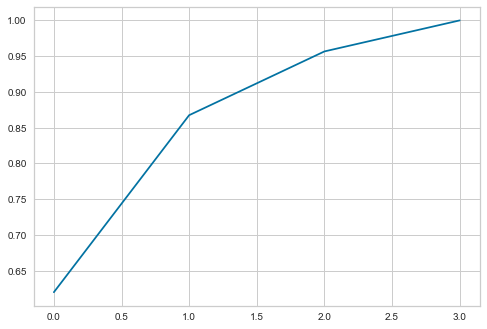

In [77]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))